In [282]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

dt = pd.read_csv(r'D:\SHIVAM-PROJECT\py\data\data_for_lr.csv')
dt.head(10)
import matplotlib.axes as ax

In [283]:
dt.isnull().sum()

x    0
y    1
dtype: int64

In [284]:
dt = dt.dropna()
dt.shape

(699, 2)

In [285]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [286]:
# training i/p and o/p
train_input = np.array(dt.x[:500]).reshape(500,1)
train_output = np.array(dt.y[:500]).reshape(500,1)

# testing
test_input = np.array(dt.x[500:699]).reshape(199,1)
test_output = np.array(dt.y[500:699]).reshape(199,1)

print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


In [287]:
# linear regression:
  # forward prop0gation 
  # f(x) = m*x + c   

def forward_prop (train_input, parameters):
    m = parameters['m']
    c = parameters['c']

    predictions = np.multiply(m , train_input) + c
    return predictions

In [288]:
# cost function = Cost = [(y - f(x)) ^ 2] * 0.5

def cost_fun(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

In [289]:
# gradient descent:
# dc/df = (y - f) * -1
# df/dw = x
# df/db = 1

def backward_propagation(train_input, train_output, predictions):

    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)

    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives



In [290]:
def update_para( parameters, derviatives , learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derviatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derviatives['dc']
    return parameters

In [291]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1) * -1
    parameters['c'] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_prop(train_input, parameters)
        
        #cost function
        cost = cost_fun(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_para(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration = 1, Loss = 3149.9695379302016


<Figure size 640x480 with 0 Axes>

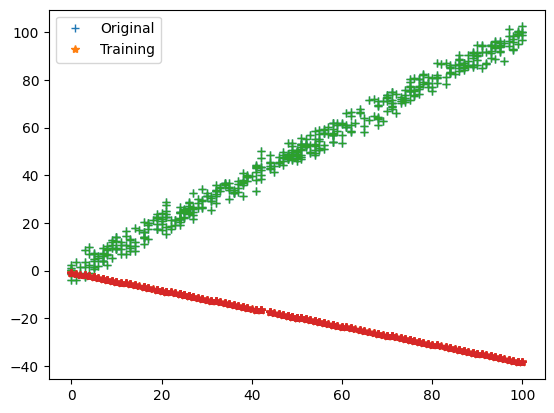

Iteration = 2, Loss = 1431.3120983093418


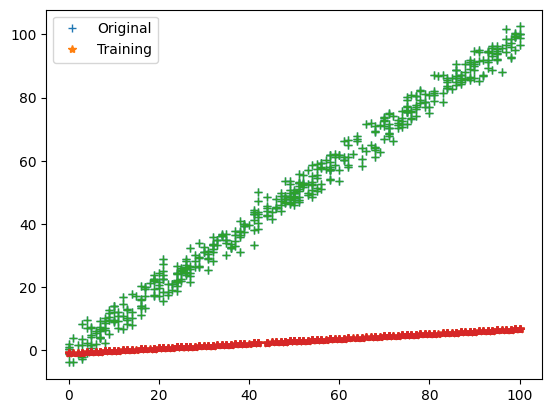

Iteration = 3, Loss = 651.5553127256751


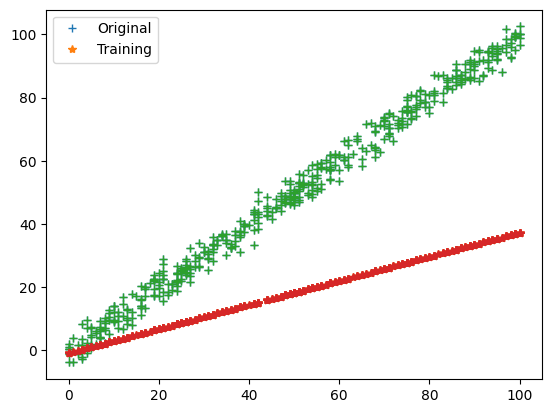

Iteration = 4, Loss = 297.7787938438223


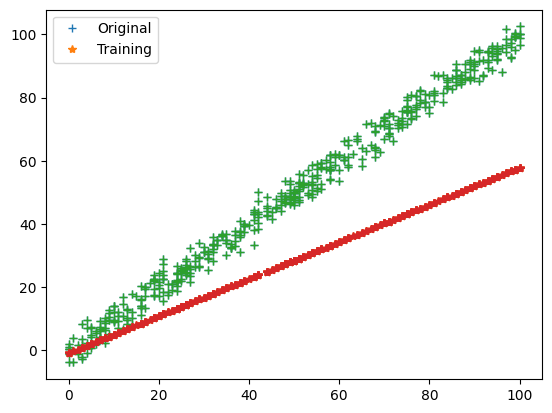

Iteration = 5, Loss = 137.26999379796146


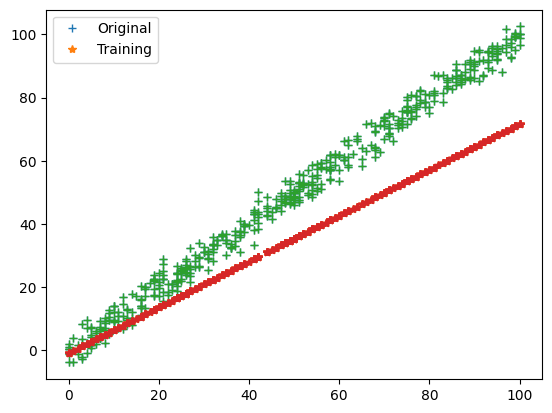

Iteration = 6, Loss = 64.44697185936018


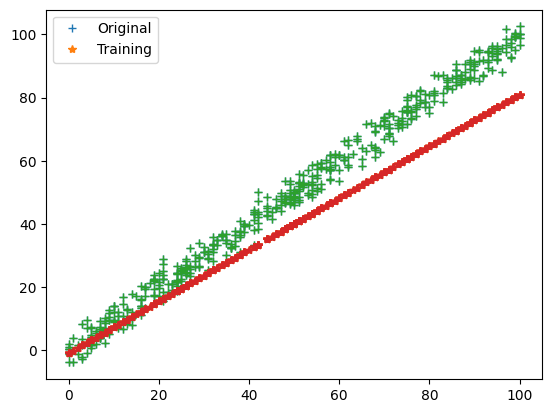

Iteration = 7, Loss = 31.407084572483416


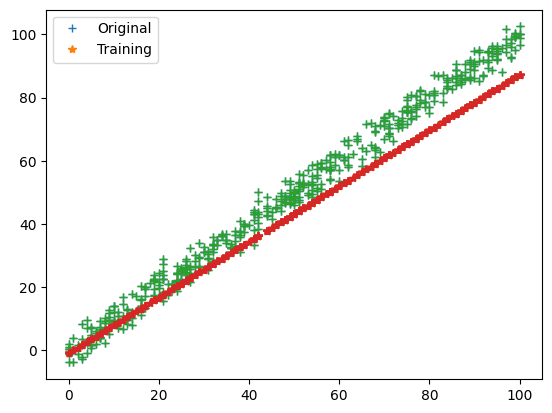

Iteration = 8, Loss = 16.41684954261278


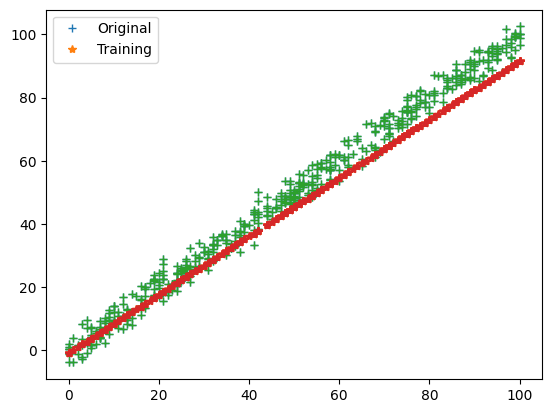

Iteration = 9, Loss = 9.615761734363746


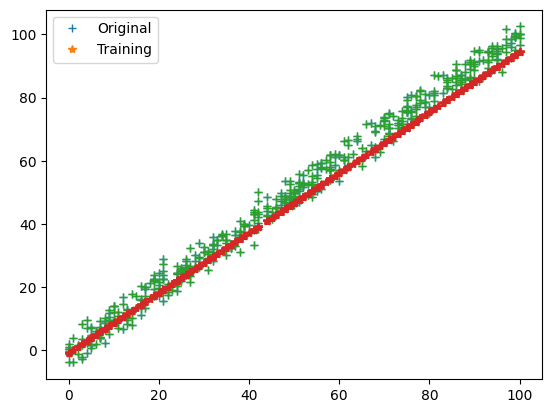

Iteration = 10, Loss = 6.530099091280557


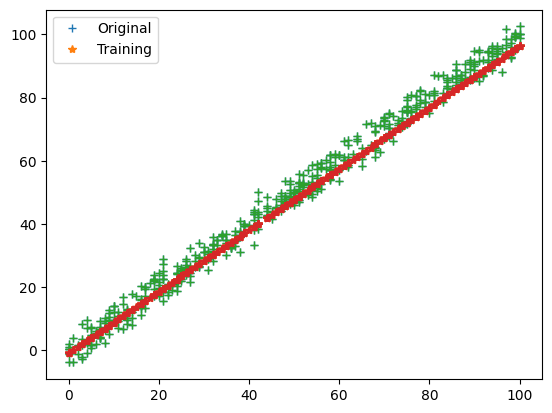

Iteration = 11, Loss = 5.1301289610703025


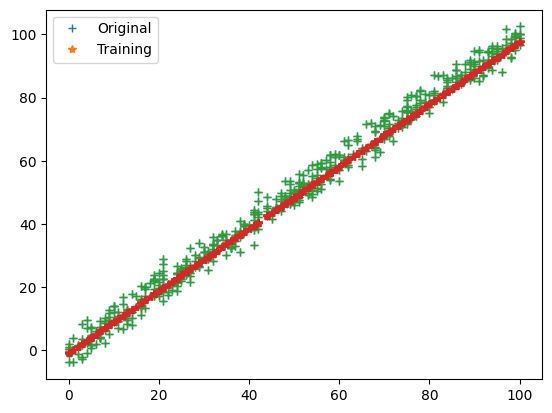

Iteration = 12, Loss = 4.4949593911721495


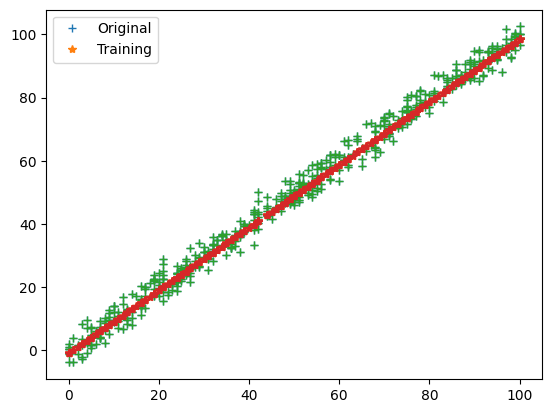

Iteration = 13, Loss = 4.206780682691359


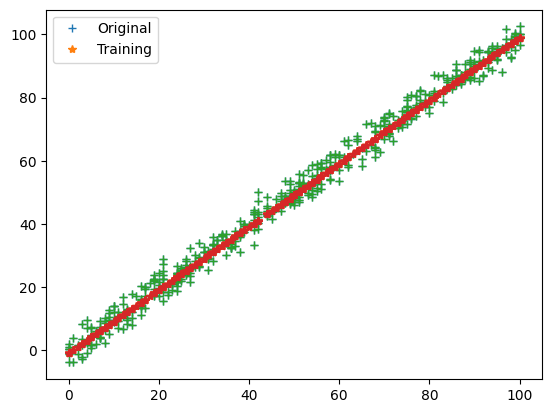

Iteration = 14, Loss = 4.076032112456143


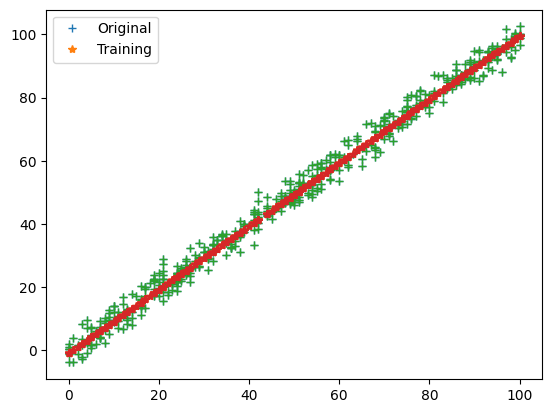

Iteration = 15, Loss = 4.016709770398195


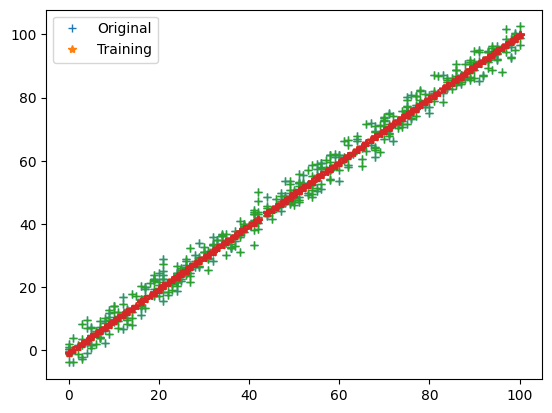

Iteration = 16, Loss = 3.9897935872580366


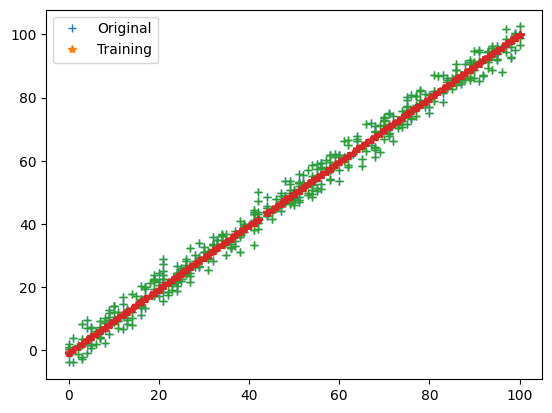

Iteration = 17, Loss = 3.9775801143924054


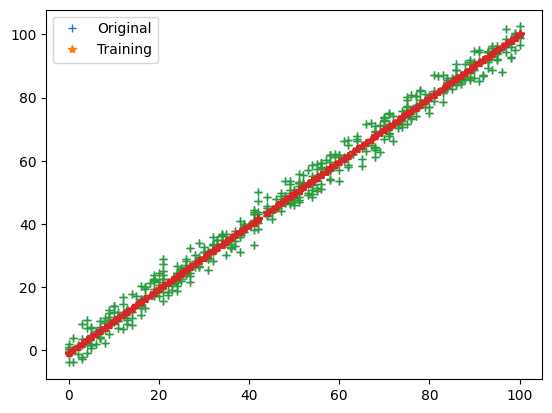

Iteration = 18, Loss = 3.9720372775427815


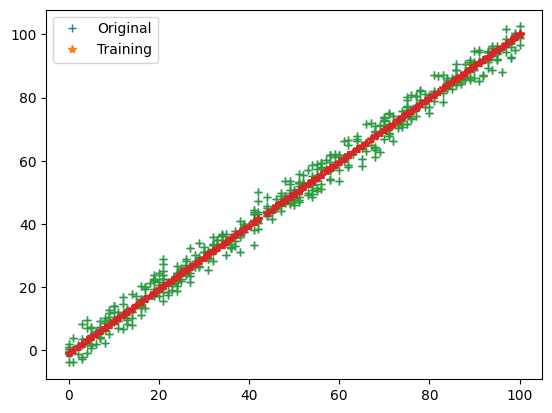

Iteration = 19, Loss = 3.9695209157214095


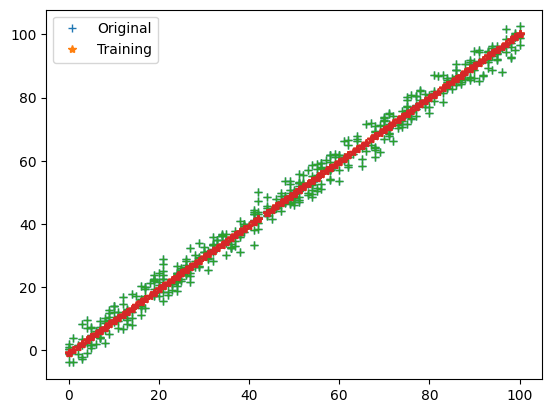

Iteration = 20, Loss = 3.9683776690517205


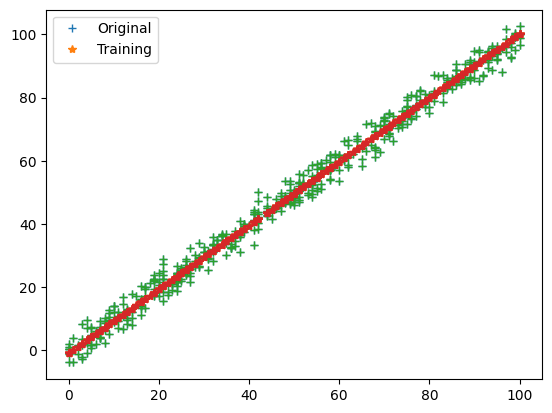

In [292]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [293]:
print(parameters)

{'m': np.float64(1.0106776537746769), 'c': np.float64(-0.9091295250303859)}


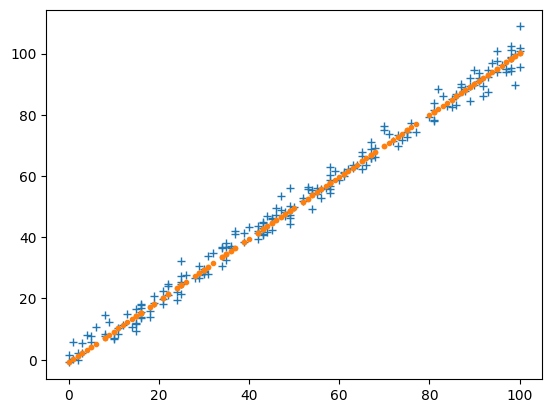

In [294]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

In [295]:
cost_fun(test_predictions, test_output)

np.float64(4.154911688323429)